<a href="https://colab.research.google.com/github/dfdavila/AI6/blob/master/ML_Lesson_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/fastai/fastai@2e1ccb58121dc648751e2109fc0fbf6925aa8887

  Cloning https://github.com/fastai/fastai (to revision 2e1ccb58121dc648751e2109fc0fbf6925aa8887) to /tmp/pip-req-build-avzqpxzt
  Running command git clone -q https://github.com/fastai/fastai /tmp/pip-req-build-avzqpxzt
  Running command git checkout -q 2e1ccb58121dc648751e2109fc0fbf6925aa8887
  Stored in directory: /tmp/pip-ephem-wheel-cache-pmkpojra/wheels/25/e9/9b/223e47f59c39f0bd393733db0f7efe8ec6f078d29c32198f9f
Successfully built fastai


In [0]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [0]:
from fastai.imports import *
from fastai.structured import *

In [0]:
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

In [5]:
#Load the driver helper and mount
from google.colab import drive #permite usar archivos de drive

#This will prompt for authorization
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
#lists the content of your google drive
!ls gdrive/'My Drive'/'Lesson 1'

 DL_Lesson_1.ipynb     'ML Lesson 1.ipynb'   Train.csv
 Machine_Appendix.csv   Test.csv


In [7]:
!ls

gdrive	sample_data  tmp


In [8]:
!head gdrive/'My Drive'/'Lesson 1'/Train.csv

SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
1139246,66000,999089,3157,121,3,2004,68,Low,11/16/2006 0:00,521D,521,D,,,,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,,EROPS w AC,None or Unspecified,,None or Unspecified,,,,,,,,2 Valve,,,,,None or Unspecified,None or Unspecified,,,,,,,,,,,,,Standard,Conventional
1139248,57000,117657,77,121,3,1996,4640,Lo

In [0]:
PATH="gdrive/My Drive/Lesson 1/"

In [0]:
df_raw = pd.read_csv(f'{PATH}Train.csv', low_memory=False, parse_dates=['saledate'])

In [11]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
SalesID                     401125 non-null int64
SalePrice                   401125 non-null int64
MachineID                   401125 non-null int64
ModelID                     401125 non-null int64
datasource                  401125 non-null int64
auctioneerID                380989 non-null float64
YearMade                    401125 non-null int64
MachineHoursCurrentMeter    142765 non-null float64
UsageBand                   69639 non-null object
saledate                    401125 non-null datetime64[ns]
fiModelDesc                 401125 non-null object
fiBaseModel                 401125 non-null object
fiSecondaryDesc             263934 non-null object
fiModelSeries               56908 non-null object
fiModelDescriptor           71919 non-null object
ProductSize                 190350 non-null object
fiProductClassDesc          401125 non-null object
state                

In [0]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

add_datepart(df_raw, 'saledate')    # la función add_datepart  crea nuevas columnas, cada una con una parte del campo original de tipo fecha


In [13]:
df_raw.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',


In [0]:
train_cats(df_raw)


In [15]:
df_raw.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

In [0]:
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)
df_raw.UsageBand = df_raw.UsageBand.cat.codes
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/bulldozers-raw')
import feather
df_raw = feather.read_dataframe('tmp/bulldozers-raw')


In [0]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [18]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df, y)
m.score(df,y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9830934465608611

In [0]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')

def split_vals(a,n): 
  return a[:n], a[n:]

n_valid = 12000 # igual al tamaño del test data set de Kaggle
n_trn = len(df_trn)-n_valid
raw_train, raw_valid = split_vals(df_raw, n_trn)
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)


In [20]:
X_train.shape, y_train.shape, X_valid.shape #Para ver las dimensiones de nuestro conjuntos

((389125, 66), (389125,), (12000, 66))

In [0]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train),        
                rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid,   
                y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [22]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 1min 44s, sys: 186 ms, total: 1min 44s
Wall time: 53.4 s
[0.09039790391281953, 0.24900007855326342, 0.9829214283132883, 0.8892746804813111]


Una manera de acelerar el proceso es pasarle a la función “proc_df” el parámetro “subset”. Esto creara una muestra aleatoria de los datos.

In [0]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice', subset=30000, na_dict=nas)
X_train, _ = split_vals(df_trn, 20000)
y_train, _ = split_vals(y_trn, 20000)

In [25]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


CPU times: user 4.1 s, sys: 15 ms, total: 4.12 s
Wall time: 2.18 s
[0.11293001566102003, 0.3678911659785581, 0.9724521636927035, 0.7582944109803084]


In [26]:
#Construyendo un árbol sencillo
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.5243307529817681, 0.5834994026152609, 0.40614642093115993, 0.3919646829801813]


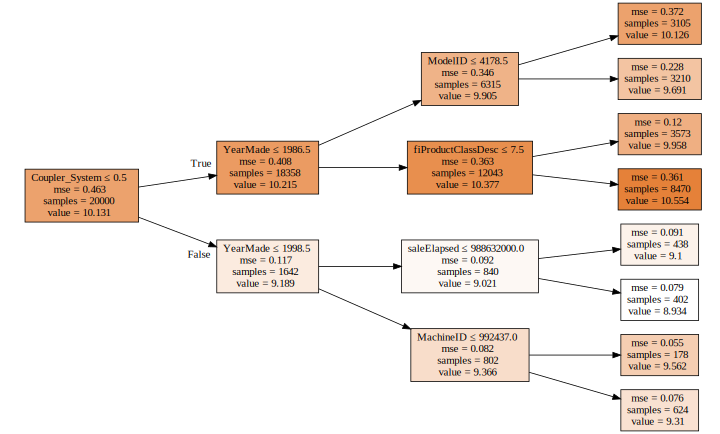

In [27]:
draw_tree(m.estimators_[0], df_trn, precision=3) #Dibujando el árbol

In [28]:
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1) #Creando un árbol más grande
m.fit(X_train, y_train)
print_score(m)

[5.329070518200751e-17, 0.5171956138629651, 1.0, 0.5222973612435087]


**Bagging**

In [29]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.11123513332924774, 0.3618832057504683, 0.9732728484419515, 0.7661244446711324]


In [0]:
preds = np.stack([t.predict(X_valid) for t in m.estimators_])

In [31]:
preds.shape

(10, 12000)

In [32]:
preds[:,0], np.mean(preds[:,0]), y_valid[0]

(array([9.74097, 9.13238, 9.15905, 9.30565, 9.39266, 9.21034, 9.13238, 9.87817, 9.41328, 9.15905]),
 9.35239242522801,
 9.104979856318357)

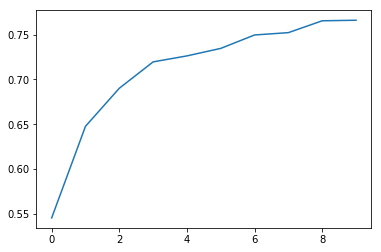

In [33]:
plt.plot([metrics.r2_score(y_valid, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

**Puntuación de fuera de bolsa / Out-of-Bag (OOB)**

In [34]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.0956288919404451, 0.33814668727528924, 0.9802463677576251, 0.7957988195958057, 0.8562540144770006]


In [0]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)

set_rf_samples(20000)  #subsampling


In [36]:
m = RandomForestRegressor(n_estimators=10, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)

m.fit(X_train, y_train)

print_score(m)

[0.24354714525752516, 0.27444036251212606, 0.8760344782027144, 0.8654932923103251, 0.8667557381473212]


In [37]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3,n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m) #Hoja de muestra mínima

[0.23210556648133557, 0.2618195431356446, 0.8874084136273649, 0.8775800788644084, 0.8783376911338131]


In [38]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True) 
m.fit(X_train, y_train)
print_score(m) #Característica máxima

[0.23350636426665156, 0.2648774421286647, 0.8860452927400924, 0.8747037936920741, 0.87746455177175]


In [0]:
set_rf_samples(50000)

In [40]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.2064207284563184, 0.24949522608167934, 0.9109484590793389, 0.8888338783744927, 0.8938641032349259]


In [41]:
#analizando desviación estandar
%time preds = np.stack([t.predict(X_valid) for t in m.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 1.76 s, sys: 24 ms, total: 1.79 s
Wall time: 1.79 s


(9.249311083166862, 0.24161222278883807)

In [42]:
def get_preds(t): return t.predict(X_valid)
%time preds = np.stack(parallel_trees(m, get_preds))
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 127 ms, sys: 301 ms, total: 427 ms
Wall time: 1.53 s


(9.249311083166862, 0.24161222278883807)

In [43]:
df_raw.Enclosure.cat.categories


Index(['EROPS', 'EROPS AC', 'EROPS w AC', 'NO ROPS', 'None or Unspecified',
       'OROPS'],
      dtype='object')

In [44]:
X_valid.Enclosure.describe (include='all')

count    12000.000000
mean         3.676417
std          2.081283
min          0.000000
25%          1.000000
50%          3.000000
75%          6.000000
max          6.000000
Name: Enclosure, dtype: float64

In [45]:
X_valid.Enclosure.value_counts()

6    4913
3    3777
1    3308
0       2
Name: Enclosure, dtype: int64

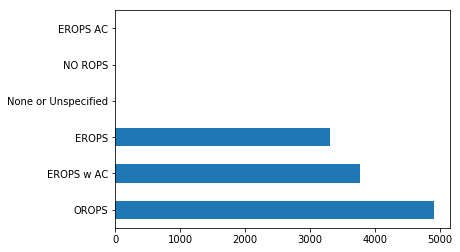

In [46]:
x = raw_valid.copy()                         # volvemos a usar los datos originales sin procesamiento
x['pred_std'] = np.std(preds, axis=0)        # añadimos una columna con std de los pronósticos       
x['pred'] = np.mean(preds, axis=0)           # añadimos una columna con mean de los pronósticos
x.Enclosure.value_counts().plot.barh();      # graficamos los valores en la columna Enclosure

In [47]:
x.Enclosure.value_counts()                  # los mismos datos del gráfico

OROPS                  4913
EROPS w AC             3777
EROPS                  3308
None or Unspecified       0
NO ROPS                   0
EROPS AC                  0
Name: Enclosure, dtype: int64

In [48]:
# creamos un nuevo data frame flds, solamente con los datos que quermos analizar
flds = ['Enclosure', 'SalePrice', 'pred', 'pred_std']
enc_summ = x[flds].groupby('Enclosure', as_index=False).mean()
enc_summ

,Enclosure,SalePrice,pred,pred_std
0,EROPS,9.849178,9.837670,0.272600
1,EROPS AC,NaN,NaN,NaN
2,EROPS w AC,10.623971,10.581489,0.259890
3,NO ROPS,NaN,NaN,NaN
4,None or Unspecified,NaN,NaN,NaN
5,OROPS,9.682064,9.686541,0.218995


In [49]:
isinstance (enc_summ, pd.DataFrame)    # enc_summ es otro data frame

True

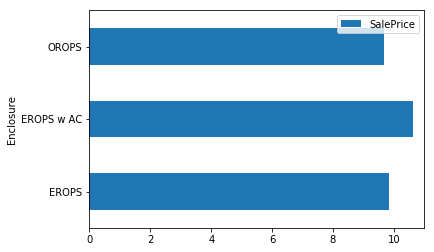

In [50]:
enc_summ = enc_summ[~pd.isnull(enc_summ.SalePrice)]
enc_summ.plot('Enclosure', 'SalePrice', 'barh', xlim=(0,11));

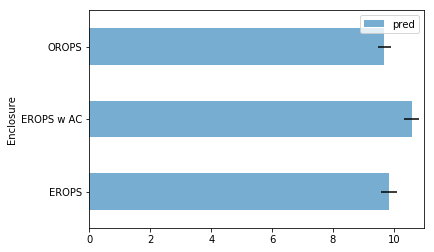

In [51]:

enc_summ.plot('Enclosure', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0,11));

In [0]:
# añadimos al análisis la diferencia entre el precio real y el pronosticado
x['diferencia'] = ((x.SalePrice-x.pred)/x.SalePrice)*100 

In [54]:
# creamos un nuevo data frame flds, solamente con los datos que queremos analizar
flds = ['Enclosure', 'SalePrice', 'pred', 'pred_std','diferencia']
enc_summ = x[flds].groupby('Enclosure', as_index=False).mean()
enc_summ

,Enclosure,SalePrice,pred,pred_std,diferencia
0,EROPS,9.849178,9.837670,0.272600,0.021565
1,EROPS AC,NaN,NaN,NaN,NaN
2,EROPS w AC,10.623971,10.581489,0.259890,0.333389
3,NO ROPS,NaN,NaN,NaN,NaN
4,None or Unspecified,NaN,NaN,NaN,NaN
5,OROPS,9.682064,9.686541,0.218995,-0.130906


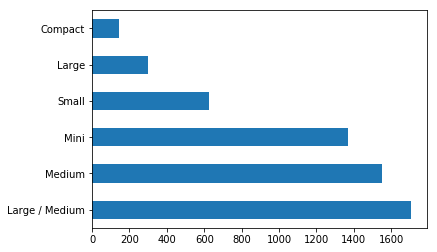

In [55]:

raw_valid.ProductSize.value_counts().plot.barh();

In [56]:

flds = ['ProductSize', 'SalePrice', 'pred', 'pred_std']
summ = x[flds].groupby(flds[0]).mean()
summ

,SalePrice,pred,pred_std
ProductSize,,,
Compact,9.735093,9.879715,0.335090
Large,10.470589,10.386486,0.360400
Large / Medium,10.691871,10.646876,0.292008
Medium,10.681511,10.626011,0.282591
Mini,9.535147,9.562862,0.242313
Small,10.324448,10.318547,0.312922


In [57]:

(summ.pred_std/summ.pred).sort_values(ascending=False)

ProductSize
Large             0.034699
Compact           0.033917
Small             0.030326
Large / Medium    0.027427
Medium            0.026594
Mini              0.025339
dtype: float64

In [58]:

(enc_summ.pred_std/enc_summ.pred).sort_values(ascending=False)

0    0.027710
2    0.024561
5    0.022608
1         NaN
3         NaN
4         NaN
dtype: float64

In [59]:
enc_summ.sort_values(by=['pred'])

,Enclosure,SalePrice,pred,pred_std,diferencia
5,OROPS,9.682064,9.686541,0.218995,-0.130906
0,EROPS,9.849178,9.837670,0.272600,0.021565
2,EROPS w AC,10.623971,10.581489,0.259890,0.333389
1,EROPS AC,NaN,NaN,NaN,NaN
3,NO ROPS,NaN,NaN,NaN,NaN
4,None or Unspecified,NaN,NaN,NaN,NaN


In [60]:

raw_valid.Enclosure.value_counts()

OROPS                  4913
EROPS w AC             3777
EROPS                  3308
None or Unspecified       0
NO ROPS                   0
EROPS AC                  0
Name: Enclosure, dtype: int64

In [61]:
m.feature_importances_

array([0.02584, 0.018  , 0.06586, 0.0011 , 0.00386, 0.17398, 0.0022 , 0.00089, 0.0326 , 0.022  , 0.03936,
       0.00394, 0.01607, 0.09182, 0.08248, 0.00656, 0.01511, 0.01354, 0.0074 , 0.03855, 0.00071, 0.00273,
       0.0006 , 0.00073, 0.00248, 0.00133, 0.00044, 0.00085, 0.00074, 0.00092, 0.01145, 0.00045, 0.00268,
       0.00208, 0.0002 , 0.0066 , 0.0021 , 0.1421 , 0.01038, 0.03592, 0.00515, 0.00086, 0.00265, 0.00077,
       0.00054, 0.00085, 0.00027, 0.00287, 0.00218, 0.00019, 0.00016, 0.02244, 0.00252, 0.00479, 0.00662,
       0.00329, 0.00621, 0.00006, 0.00004, 0.00002, 0.00002, 0.     , 0.     , 0.04946, 0.00021, 0.00121])

In [62]:
nombreColumnas=X_train.columns.values

for i in range(len(nombreColumnas)):
    print (f'Columna {i:3} {nombreColumnas[i]:35} -> {m.feature_importances_[i]:f}')
    
  

Columna   0 SalesID                             -> 0.025836
Columna   1 MachineID                           -> 0.018004
Columna   2 ModelID                             -> 0.065857
Columna   3 datasource                          -> 0.001100
Columna   4 auctioneerID                        -> 0.003862
Columna   5 YearMade                            -> 0.173980
Columna   6 MachineHoursCurrentMeter            -> 0.002201
Columna   7 UsageBand                           -> 0.000890
Columna   8 fiModelDesc                         -> 0.032600
Columna   9 fiBaseModel                         -> 0.022000
Columna  10 fiSecondaryDesc                     -> 0.039357
Columna  11 fiModelSeries                       -> 0.003943
Columna  12 fiModelDescriptor                   -> 0.016075
Columna  13 ProductSize                         -> 0.091820
Columna  14 fiProductClassDesc                  -> 0.082483
Columna  15 state                               -> 0.006555
Columna  16 ProductGroup                

In [63]:
fi = rf_feat_importance(m, df_trn)       
fi[:10]# presenta las 5 variables más importantes10

,cols,imp
5,YearMade,0.173980
37,Coupler_System,0.142095
13,ProductSize,0.091820
14,fiProductClassDesc,0.082483
2,ModelID,0.065857
63,saleElapsed,0.049457
10,fiSecondaryDesc,0.039357
19,Enclosure,0.038549
39,Hydraulics_Flow,0.035918
8,fiModelDesc,0.032600


In [64]:
fi[len(fi)-10:]    # presenta los 5 elementos menos importantes

,cols,imp
64,auctioneerID_na,0.000211
34,Tip_Control,0.000203
49,Differential_Type,0.000189
50,Steering_Controls,0.000163
57,saleIs_month_end,0.000058
58,saleIs_month_start,0.000039
60,saleIs_quarter_start,0.000024
59,saleIs_quarter_end,0.000023
61,saleIs_year_end,0.000000
62,saleIs_year_start,0.000000


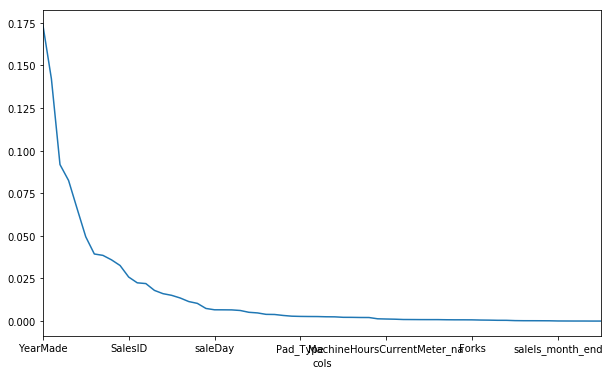

In [65]:

fi.plot('cols', 'imp', figsize=(10,6), legend=False);

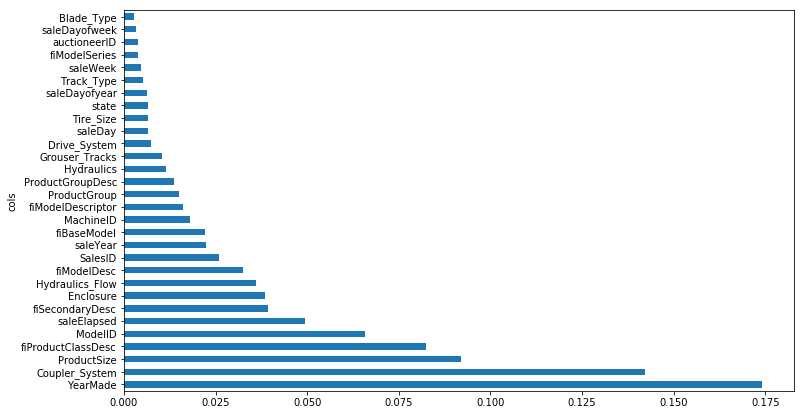

In [66]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)
plot_fi(fi[:30]);

In [67]:
to_keep = fi[fi.imp>0.005].cols            # mantenemos solo los valores que son mayores a 0.005
len(to_keep)

25

In [0]:
df_keep = df_trn[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [69]:
nombreColumnas=X_train.columns.values

for i in range(len(nombreColumnas)):
    print (f'Columna {i:3} {nombreColumnas[i]:35} -> {m.feature_importances_[i]:f}')

Columna   0 YearMade                            -> 0.025836
Columna   1 Coupler_System                      -> 0.018004
Columna   2 ProductSize                         -> 0.065857
Columna   3 fiProductClassDesc                  -> 0.001100
Columna   4 ModelID                             -> 0.003862
Columna   5 saleElapsed                         -> 0.173980
Columna   6 fiSecondaryDesc                     -> 0.002201
Columna   7 Enclosure                           -> 0.000890
Columna   8 Hydraulics_Flow                     -> 0.032600
Columna   9 fiModelDesc                         -> 0.022000
Columna  10 SalesID                             -> 0.039357
Columna  11 saleYear                            -> 0.003943
Columna  12 fiBaseModel                         -> 0.016075
Columna  13 MachineID                           -> 0.091820
Columna  14 fiModelDescriptor                   -> 0.082483
Columna  15 ProductGroup                        -> 0.006555
Columna  16 ProductGroupDesc            

In [70]:

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=3, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [71]:
print_score(m)

[0.20725644674864266, 0.2464950557666278, 0.9102259283982072, 0.8914913402997362, 0.8938702710130495]


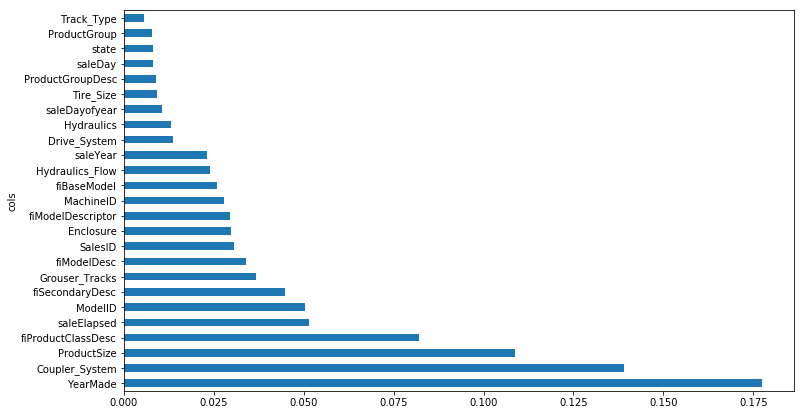

In [72]:
fi = rf_feat_importance(m, df_keep)
plot_fi(fi);

In [0]:
from sklearn.utils import shuffle

In [0]:
def print_score_shuffle(m):                                           #definimos una función para que imprima rmse y score de entrenamiento y validación
    res = ["--m.score valid: ", m.score(X_shuffle, y_shuffle)]
    print(res)

In [0]:
def shuffle_columna(dfAux, varAux):        #crea una copia del dataframe dfAux, con los datos de varAux en orden aleatorio
  n=dfAux.columns.get_loc(varCol)
  dfextra = pd.DataFrame(shuffle(dfAux[varAux].tolist()))
  dfextra.index=dfAux.index.tolist()
  dfAux2 = dfAux.drop ([dfAux.columns[n]],axis=1)
  dfAux2.insert(loc=n, column=varAux, value=dfextra)
  return dfAux2

In [76]:
X_shuffle = X_valid
y_shuffle = y_valid
print_score_shuffle(m)

['--m.score valid: ', 0.8914913402997362]


In [77]:
varCol = 'YearMade'
X_shuffle = shuffle_columna (X_valid, varCol)
print_score_shuffle(m)

['--m.score valid: ', 0.5707696325560112]


In [78]:
varCol = 'Enclosure'
X_shuffle = shuffle_columna (X_valid, varCol)
print_score_shuffle(m)

['--m.score valid: ', 0.8573838078528311]


In [79]:
varCol = 'state'
X_shuffle = shuffle_columna (X_valid, varCol)
print_score_shuffle(m)

['--m.score valid: ', 0.8907326818094292]


In [80]:
varCol = 'ProductSize'
X_shuffle = shuffle_columna (X_valid, varCol)
print_score_shuffle(m)

['--m.score valid: ', 0.6001195630361931]


In [81]:
varCol = 'fiProductClassDesc'
X_shuffle = shuffle_columna (X_valid, varCol)
print_score_shuffle(m)

['--m.score valid: ', 0.743132674408794]


In [82]:
df_trn2, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)

m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.20734181806451013, 0.25257729581491445, 0.9101519552194184, 0.8860703947975702, 0.8924454280821095]


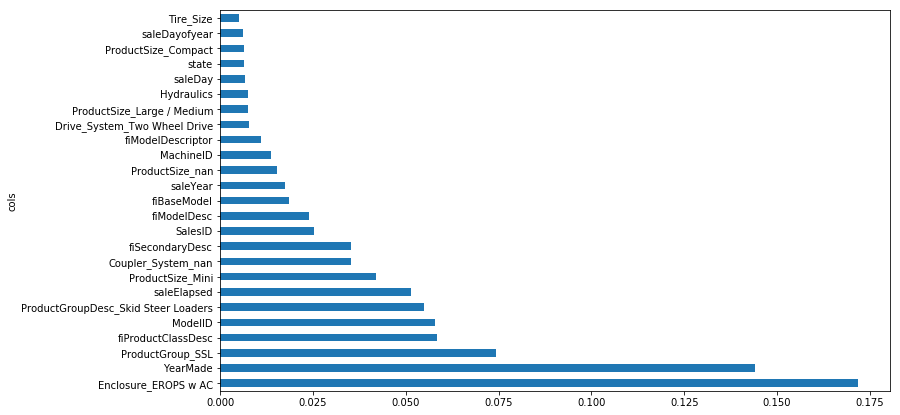

In [83]:
fi = rf_feat_importance(m, df_trn2)                   # en fi guardamos las columnas con su valor de importancia
plot_fi(fi[:25]);                                     # graficamos las 25 más importantes

In [0]:
from scipy.cluster import hierarchy as hc

In [0]:
corr = np.round(scipy.stats.spearmanr(df_keep).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)


In [86]:
df_keep.shape             # es la matriz con la que estamos trabajando, tiene menos columnas que las 66 columnas iniciales

(401125, 25)

In [87]:
corr.shape                # es la matriz de correlación

(25, 25)

In [88]:
print ("Matriz de correlacion \n\n")
for i in range (0,corr.shape[0]):
  for j in range (0,corr.shape[1]):
    print (f'{corr[i,j]:+f} ', end = " ")
  print ("")
   

Matriz de correlacion 


+1.000000  +0.186700  -0.025200  -0.147100  +0.095500  +0.512200  +0.131300  +0.133600  +0.185100  -0.076400  +0.230100  +0.512200  -0.081900  -0.038100  +0.221900  -0.131000  -0.131000  +0.029200  +0.187000  -0.042200  +0.018000  -0.189000  -0.046200  +0.015400  +0.089100  
+0.186700  +1.000000  -0.310900  +0.082200  +0.249500  +0.081100  -0.282600  +0.314200  +0.998200  -0.021500  +0.085400  +0.080400  -0.021700  +0.039300  -0.160500  -0.226900  -0.226900  +0.356300  +0.998100  -0.203900  +0.004100  -0.191700  -0.013700  +0.015400  -0.198700  
-0.025200  -0.310900  +1.000000  +0.102600  -0.022200  +0.011700  -0.093100  -0.433800  -0.310600  +0.256600  +0.032700  +0.012400  +0.256300  -0.058300  +0.224700  +0.441700  +0.441700  +0.392000  -0.310500  -0.522200  +0.005500  +0.011500  +0.005300  -0.011200  +0.628400  
-0.147100  +0.082200  +0.102600  +1.000000  +0.008500  -0.034300  +0.069200  +0.077400  +0.081900  +0.329600  +0.009400  -0.033400  +0.329700  -0.0

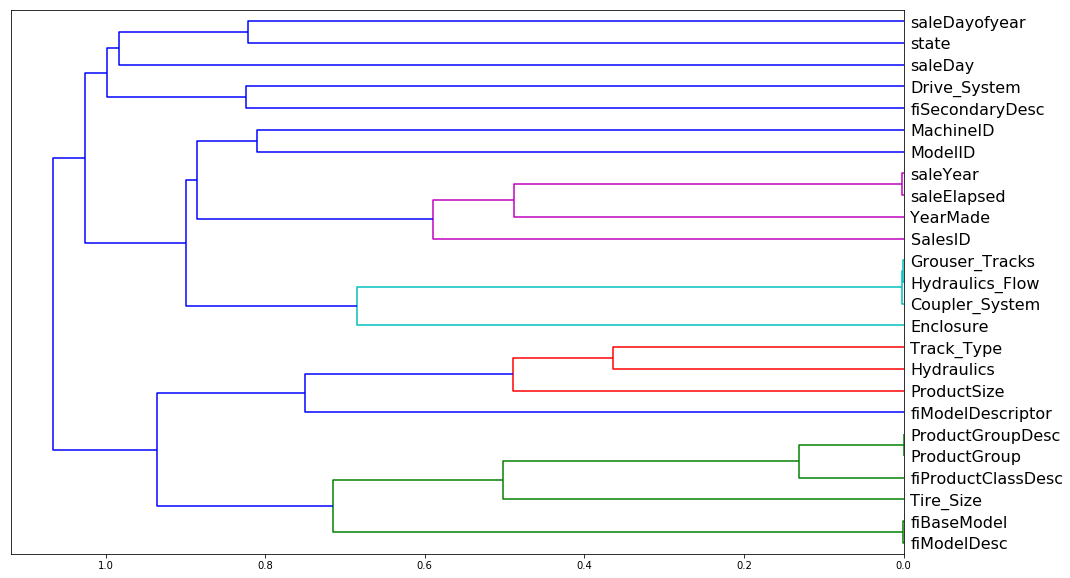

In [89]:
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(16,10))
dendrogram = hc.dendrogram(z, labels=df_keep.columns, orientation='left', leaf_font_size=16)
plt.show()

In [90]:
nombreColumnas=df_keep.columns.values

for i in range(len(nombreColumnas)):
    print (f'Columna {i:3} {nombreColumnas[i]:35}')

Columna   0 YearMade                           
Columna   1 Coupler_System                     
Columna   2 ProductSize                        
Columna   3 fiProductClassDesc                 
Columna   4 ModelID                            
Columna   5 saleElapsed                        
Columna   6 fiSecondaryDesc                    
Columna   7 Enclosure                          
Columna   8 Hydraulics_Flow                    
Columna   9 fiModelDesc                        
Columna  10 SalesID                            
Columna  11 saleYear                           
Columna  12 fiBaseModel                        
Columna  13 MachineID                          
Columna  14 fiModelDescriptor                  
Columna  15 ProductGroup                       
Columna  16 ProductGroupDesc                   
Columna  17 Hydraulics                         
Columna  18 Grouser_Tracks                     
Columna  19 Drive_System                       
Columna  20 saleDay                     

In [91]:
corr[4,:]                 # la columna 4 tiene alta correlacion
                          # con otras columnas, vamos a analizarla

array([ 0.0955,  0.2495, -0.0222,  0.0085,  1.    ,  0.0726, -0.288 ,  0.0036,  0.2488,  0.087 ,  0.1911,
        0.0722,  0.0891,  0.1902, -0.2507, -0.0538, -0.0538,  0.1481,  0.2496, -0.0677,  0.0019,  0.0134,
       -0.0225,  0.0063,  0.0351])

In [92]:
print ("Correlacion de :", nombreColumnas[4],"con: ",  nombreColumnas[1], " =" , corr[4,1], "con: ", nombreColumnas[12], corr[4,12])

Correlacion de : ModelID con:  Coupler_System  = 0.2495 con:  fiBaseModel 0.0891


In [0]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=30, min_samples_leaf=5, max_features=0.6, n_jobs=-1, oob_score=True)
    x, _ = split_vals(df, n_trn)
    m.fit(x, y_train)
    return m.oob_score_

In [94]:
get_oob(df_keep)                     # esta es nuestra linea base

0.8908227172133624

In [95]:

# este lazo utiliza la funcion get_obb para calcular la precision de un random forest eliminando uno a uno los parametros

for c in ('saleYear', 'saleElapsed', 'fiModelDesc', 'fiBaseModel', 'Grouser_Tracks', 'Coupler_System'):
    print(f'obb score si se elimina {c:15} = {get_oob(df_keep.drop(c, axis=1)):f}')

obb score si se elimina saleYear        = 0.888915
obb score si se elimina saleElapsed     = 0.886872
obb score si se elimina fiModelDesc     = 0.888266
obb score si se elimina fiBaseModel     = 0.888900
obb score si se elimina Grouser_Tracks  = 0.890503
obb score si se elimina Coupler_System  = 0.890186


In [96]:
# descartamos 1 elemento de cada grupo y volvemos a generar el modelo

to_drop = ['saleYear', 'fiBaseModel', 'Grouser_Tracks']
get_oob(df_keep.drop(to_drop, axis=1))

0.8888314217576833

In [97]:
# pruebo eliminando otro elemento del grupo que analizamos
to_drop = ['saleYear', 'fiBaseModel', 'Grouser_Tracks', 'Hydraulics_Flow']
get_oob(df_keep.drop(to_drop, axis=1))

0.8891554946905647

In [0]:
# from here on we will use this model

df_keep.drop(to_drop, axis=1, inplace=True)
X_train, X_valid = split_vals(df_keep, n_trn)

In [0]:
reset_rf_samples()

In [100]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.12574444635886986, 0.22765563098729716, 0.9669544905045002, 0.9074439594235482, 0.9086481326430008]


In [101]:
!pip install pdpbox
!pip install scikit-misc

     |████████████████████████████████| 57.7MB 405kB/s 
  Stored in directory: /root/.cache/pip/wheels/7d/08/51/63fd122b04a2c87d780464eeffb94867c75bd96a64d500a3fe
Successfully built pdpbox
     |████████████████████████████████| 9.2MB 2.1MB/s 


In [0]:
from pdpbox import pdp
from plotnine import *

In [0]:
set_rf_samples(5000)

In [0]:
df_trn2, y_trn, nas = proc_df(df_raw, 'SalePrice', max_n_cat=7)
X_train, X_valid = split_vals(df_trn2, n_trn)
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.6, n_jobs=-1)
m.fit(X_train, y_train);

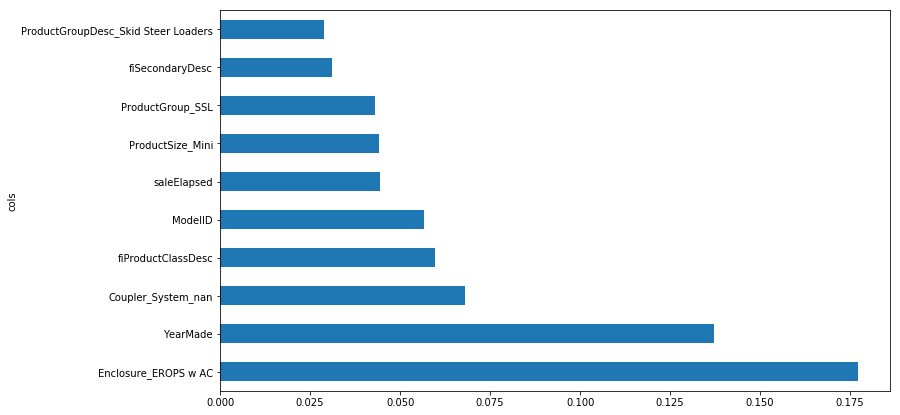

In [105]:
plot_fi(rf_feat_importance(m, df_trn2)[:10]);

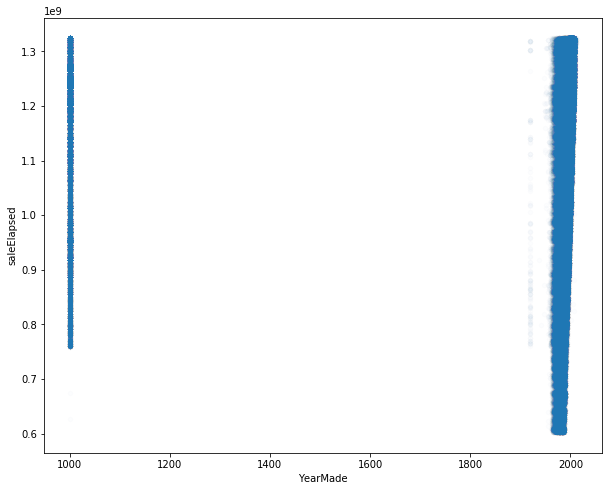

In [106]:
df_raw.plot('YearMade', 'saleElapsed', 'scatter', alpha=0.01, figsize=(10,8));

In [0]:
x_all = get_sample(df_raw[df_raw.YearMade>1930], 500)

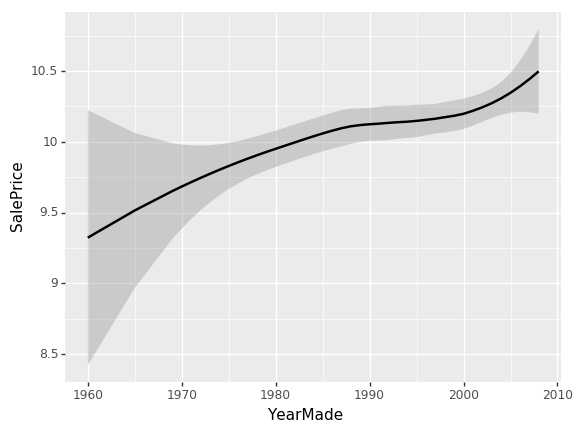

<ggplot: (-9223363269713485743)>

In [108]:
ggplot(x_all, aes('YearMade', 'SalePrice'))+stat_smooth(se=True, method='loess')

In [0]:
x = get_sample(X_train[X_train.YearMade>1930], 500)

In [0]:
nombreColumnasX = x.columns.values

In [0]:
def plot_pdp(feat, clusters=None, feat_name=None):
    p = pdp.pdp_isolate(m, x,feat_name, feat)
    return pdp.pdp_plot(p, feat_name, plot_lines=True,
                        cluster=clusters,
                        n_cluster_centers=clusters.any)
   

In [0]:
def plot_pdp(feat, clusters=None, feat_name=None):
    feat_name = feat
    p = pdp.pdp_isolate(m, x, nombreColumnasX, feat)
    return pdp.pdp_plot(p, feat_name, plot_lines=True,
                        cluster=clusters is not None,
                        n_cluster_centers=clusters)

In [0]:
def plot_pdp(feat, clusters=None, feat_name=None):
    feat_name = feat
    p = pdp.pdp_isolate(m, x, nombreColumnasX, feat)
    return pdp.pdp_plot(p, feat_name, plot_lines=True,
                        cluster=clusters is not None,
                        n_cluster_centers=clusters)

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f9411287588>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f9425ee5080>})

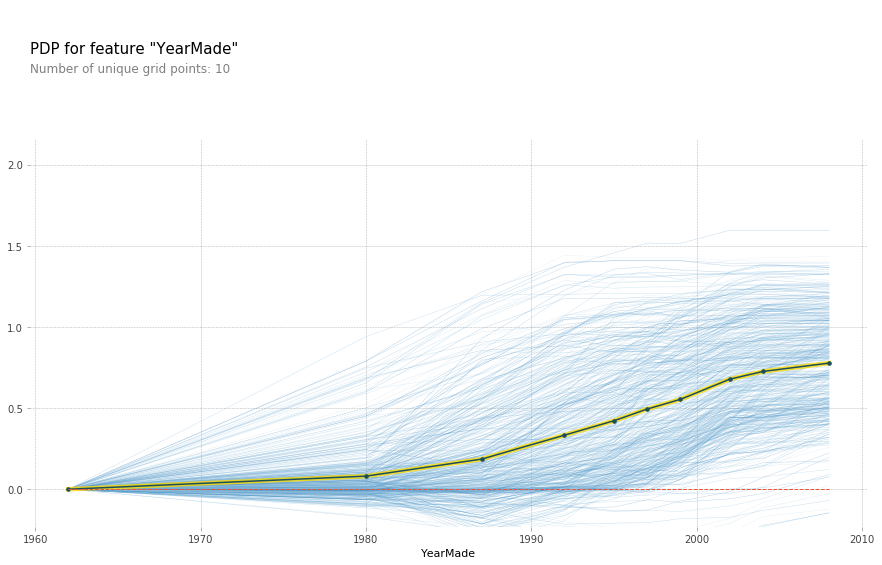

In [114]:
plot_pdp("YearMade", None, nombreColumnasX)

(<Figure size 1080x684 with 2 Axes>,
 {'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f9410c8eb70>,
  'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x7f9410c7b5c0>})

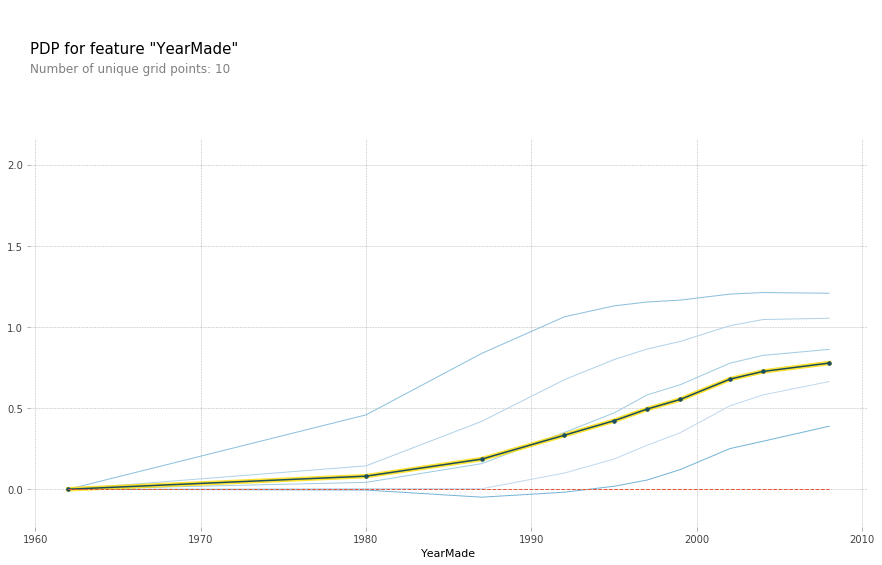

In [115]:

plot_pdp('YearMade', clusters=5)